# Lab 12: Multilayer perceptron classification using *scikit-learn*


## Using a perceptron to for classification of a small example dataset

A small, made up dataset is provided below, and is composed of the following:

- *X*: the feature matrix consisting of 100 values of 1 variable
- *y*: the target values, consisting of either 0 or 1


In [ ]:
# Generate X values from 1 - 100
X = np.arange(1,101)

# Generate corresponding target values which are to 1 if the feature > 50; or 0 otherwise
l = [int(x > 50) for x in X]
y = np.array(l)

# X must be 2-dimensional for scikit learn, so reshape the data
X = X.reshape((100, 1))

### Question 1

Use the seaborn module to generate a scatterplot that plots the first column of X on the x-axis and the number 0 on the y-axis (the second argument should simply be 0), and color the points by *y* value. The plot should look like the plot below

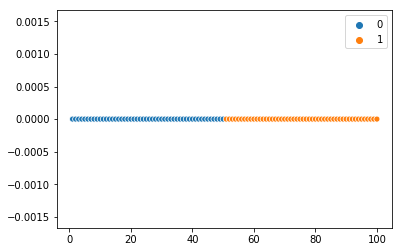

The code below fits a *Perceptron* classifier to the data. As covered in class, a perceptron consist of an input layer, a single neuron, and an output layer. The single neuron fires if the sum of weighted inputs is greater than the bias term.

In [ ]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=5000, random_state = 1, tol = 1e-10)
perceptron.fit(X,y)

### Question 2
Show that the perceptron fits the training data with 100% accuracy, by creating a heatmap showing the confusion matrix for predictions on the training data.

### Question 3
The weight and bias term for the neuron are displayed below. Based on the weight and bias term, when does the neuron fire? Given the graph of the data from Question 1 (and using a little bit of algebra), does this make sense? Why or why not?

(Note: the intercept has the opposite sign of the bias term that we discussed in class; hence we output *-perceptron.intercept_[0]*; this output is the *bias*)

In [ ]:
print('The weight for the first layer is:', perceptron.coef_[0][0])
print('The bias for the first layer is: ', -perceptron.intercept_[0])

Answer: 

## Multilayer perceptron on the MNIST dataset

We will now use a multilayer perceptron to classify the MNIST dataset, considering all 10 digits

### Load the data

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

### Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21, stratify = y)

### Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler on the training data
scaler.fit(X_train)

# then user the scaler to scale the training and testing data 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Fit the model

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=10, max_iter=1000, verbose = True, random_state=211)
mlp.fit(X_train, y_train)

### Plot the loss curve

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mlp.loss_curve_)
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.title('The loss curve for our mlp classifier')
None

### Make predictions in the *test* dataset

In [ ]:
y_pred = mlp.predict(X_test)

### Evaluate the results by looking at the *confusion matrix*

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
df = pd.DataFrame(confusion)
s = sns.heatmap(df, annot = True, cmap = 'nipy_spectral_r', )
s.set_title('Confusion matrix for MNIST dataset')
None

### Question 5

Based on the heatmap above, use Python as a calculator to output (a) the recall of the digit 8 and (b) the precision for the digit 8.

### Question 5

In the test dataset, the 50th value is predicted to be a 3, as shown in the code below. What is the true value of the 50th digit?

In [ ]:
# get 50th value; reshape is needed to maintain 2D format
X50 = X_test[49,].reshape(1,-1)
mlp.predict(X50)

In [ ]:
# output true value of the 50th target value



Recall that for a test input, the neural network calculates probabilities for each possible target value (0 - 9), and then chooses the target value with highest probability. If the prediction is not correct, the correct target value may still have had a high probability. From the code below, what are the two digits with the highest probabilities? 

In [ ]:
p = mlp.predict_proba(X50)
pd.DataFrame(p.round(3))

### Question 6

We can use cross validation to find the the optimal number of hidden nodes (and layers). Modify the code below to evaluate hidden layer sizes of 10, 30, 64, 100, and 200. by completing the "FIX ME" sections (Note: this may take 1-2 minutes to run). In addition, other parameters can be optimized such as the number of epochs and the learning rate (we will not worry about these now). Neural networks are considerably more complex than *kNN*.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# create an empty list to store accuracies
acc = []

# FIX ME: create 'sizes' list containing values 10, 30, 64, 100, and 200
sizes = [10]

# for each value of 'k', create a knn estimator and find the mean balanced accuracy using 10-fold cross validation
for size in sizes :

    print('training with size = ', size)
    
    # FIX ME: create kNN model (estimator) using the current size, and other arguments as below
    mlp = MLPClassifier(max_iter=1000, verbose = False, random_state=211)
    
    # create the k = 5 folds
    kfold = KFold(n_splits=5, random_state=99)
    
    # return an array of scores that contains the balanced accuracy for each fold
    scores = cross_val_score(estimator = mlp, X = digits.data, y = digits.target, cv = kfold, scoring = "balanced_accuracy" )
    print('\tmean balanced accuracy with size = ', size, ': ', scores.mean(), sep = '')

    # add the mean balanced accuracy for the current fold to the list
    acc.append(scores.mean())

### Question 7

Generate a scatterplot showing the size of hidden layer on the x-axis and the balanced accuracy on the y-axis. Comment on the optimal size.

### Question 8

We can improve the neural network slightly by including two layers. Use 5-fold cross-validation to evaluate a multilayer perceptron with 2 hidden layers, that consist of 200 neurons and 10 neurons, respectively. Calculate the mean balanced accuracy.